In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('Libro2.csv', sep=';')
print(data)


    datos 1  datos 2  datos 3  datos 4  datos 5
0      9.00     3571     1976    0.525      541
1      9.00     4092     1250    0.572      524
2      9.00     3865     1586    0.580      561
3      7.50     4870     2351    0.529      414
4      8.00     4399      431    0.544      410
5     10.00     5342     1333    0.571      457
6      8.00     5319    11868    0.451      344
7      8.00     5126     2138    0.553      467
8      8.00     4447     8577    0.529      464
9      7.00     4512     8507    0.552      498
10     8.00     4391     5939    0.530      580
11     7.50     5126    14186    0.525      471
12     7.00     4817     6930    0.574      525
13     7.00     4207     6580    0.545      508
14     7.00     4332     8159    0.608      566
15     7.00     4318    10340    0.586      635
16     7.00     4206     8508    0.572      603
17     7.00     3718     4725    0.540      714
18     7.00     4716     5915    0.724      865
19     8.50     4341     6010    0.677  

In [52]:
p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
data = data.drop('is_train', 1)
print(train)
print(test)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

train.to_csv('train_petrol.csv')
test.to_csv('test_petrol.csv')


    datos 1  datos 2  datos 3  datos 4  datos 5  is_train
2      9.00     3865     1586    0.580      561      True
3      7.50     4870     2351    0.529      414      True
4      8.00     4399      431    0.544      410      True
5     10.00     5342     1333    0.571      457      True
6      8.00     5319    11868    0.451      344      True
8      8.00     4447     8577    0.529      464      True
9      7.00     4512     8507    0.552      498      True
10     8.00     4391     5939    0.530      580      True
12     7.00     4817     6930    0.574      525      True
14     7.00     4332     8159    0.608      566      True
15     7.00     4318    10340    0.586      635      True
17     7.00     3718     4725    0.540      714      True
18     7.00     4716     5915    0.724      865      True
20     7.00     4593     7834    0.663      649      True
21     8.00     4983      602    0.602      540      True
23     9.00     4258     4686    0.517      547      True
24     8.50   

In [53]:
train = pd.read_csv('train_petrol.csv')
test = pd.read_csv('test_petrol.csv')


X_train = train.iloc[:, 1:5]
y_train = train.iloc[:,5]

X_test = test.iloc[:, 1:5]
y_test = test.iloc[:,5]

#print(X_train)
#print(y_train)


In [54]:
X_media = np.concatenate((X_train, X_test), axis=0).mean(axis=0)
X_std = np.concatenate((X_train, X_test), axis=0).std(axis=0)
y_media = np.concatenate((y_train, y_test), axis=0).mean()
y_std = np.concatenate((y_train, y_test), axis=0).std()

In [55]:
X_train = (X_train - X_media)/X_std
y_train = (y_train - y_media)/y_std
X_test = (X_test - X_media)/X_std
y_test = (y_test - y_media)/y_std

print(X_train.shape)

(34, 4)


In [56]:
n_exa_train = len(y_train)
n_exa_test = len(y_test)

X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)

print(X_train.shape)
print(X_train)

(34, 5)
[[ 1.          1.4154413  -0.66388654 -1.1518029   0.17611169]
 [ 1.         -0.17892312  1.10667332 -0.93038119 -0.7530293 ]
 [ 1.          0.35253169  0.27688855 -1.48610625 -0.47975254]
 [ 1.          2.47835091  1.93821984 -1.22503125  0.01214563]
 [ 1.          0.35253169  1.89769956  1.82422057 -2.17406847]
 [ 1.          0.35253169  0.3614526   0.87167309 -0.7530293 ]
 [ 1.         -0.71037792  0.47596642  0.85141228 -0.33400493]
 [ 1.          0.35253169  0.26279454  0.10813001 -0.73481085]
 [ 1.         -0.71037792  1.01330051  0.39496518  0.06680099]
 [ 1.         -0.71037792  0.15885122  0.75068711  0.68622832]
 [ 1.         -0.71037792  0.13418671  1.38195604  0.2854224 ]
 [ 1.         -0.71037792 -0.92286395 -0.24325031 -0.55262634]
 [ 1.         -0.71037792  0.83536365  0.10118345  2.79956861]
 [ 1.         -0.71037792  0.61866826  0.65661907  1.68824311]
 [ 1.          0.35253169  1.30575119 -1.43661199  0.57691761]
 [ 1.          1.4154413   0.02848164 -0.254538

In [57]:
def predict(theta, data):
    return np.dot(data, theta)
# print(predict(theta, X_train).shape)


In [58]:
# m = X.shape[0]

def cal_cost(theta, X, y):
    y_pred_test = predict(theta, X)
    to_sum = (y_pred_test - y) ** 2
    return np.sum(to_sum) / (X.shape[0]*2)

In [59]:
def gradient_descent(X,y, alpha, iterations):
    cost_history = np.zeros(iterations)
    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    
    for it in range(iterations):
        prediction = predict(theta, X)
        # m = prediction.shape[0]
        theta = theta - (1/prediction.shape[0])*alpha*( X.T.dot((prediction - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history


In [60]:
alpha = 0.01 # learning rate
iterations = 2000

theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iterations)
print(theta_r)
cost = cal_cost(theta_r,X_test, y_test)
print(cost)

[ 0.04781405 -0.25432905 -0.39163221 -0.08836989  0.76990518]
0.09735619202584798


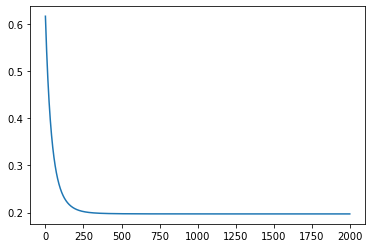

In [61]:
plt.plot(cost_history_r)
plt.show()

<h1>Experimentos</h1>

learning rate: 0.01, iteraciones:   500, costo: 0.19747518779476119777
learning rate: 0.01, iteraciones:  1000, costo: 0.19709836785495812861
learning rate: 0.01, iteraciones:  1500, costo: 0.19708459256815991090
learning rate: 0.01, iteraciones:  2000, costo: 0.19708401839675779299
learning rate: 0.01, iteraciones:  2500, costo: 0.19708399444816471213
learning rate: 0.01, iteraciones:  3000, costo: 0.19708399344926957886
learning rate: 0.01, iteraciones:  3500, costo: 0.19708399340760568430
learning rate: 0.05, iteraciones:   500, costo: 0.19708399434717327470
learning rate: 0.05, iteraciones:  1000, costo: 0.19708399340579235703
learning rate: 0.05, iteraciones:  1500, costo: 0.19708399340579224601
learning rate: 0.05, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3500, costo: 0.19708399340579221826
learni

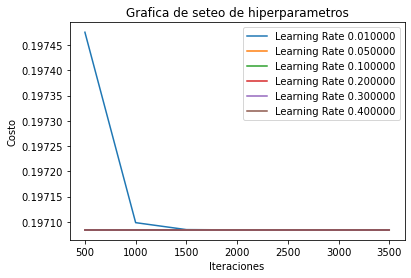

In [67]:
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
learning_rates = [0.01,0.05,0.1, 0.2, 0.3, 0.4]

n_features = X_train.shape[1]

for alpha in learning_rates:
    costo_gradiente = []
    for iteracion in  iteraciones:
        theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iteracion)
        costo_gradiente.append(cost_history_r[-1])
        print("learning rate: %1.2f, iteraciones: %5d, costo: %2.20f"%(alpha,iteracion,cost_history_r[-1]))
    
    plt.plot(iteraciones, costo_gradiente, label='Learning Rate %f'%alpha)
    
plt.title('Grafica de seteo de hiperparametros')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()


learning rate: 0.01, iteraciones:   500, costo: 0.19747518779476119777
learning rate: 0.01, iteraciones:  1000, costo: 0.19709836785495812861
learning rate: 0.01, iteraciones:  1500, costo: 0.19708459256815991090
learning rate: 0.01, iteraciones:  2000, costo: 0.19708401839675779299
learning rate: 0.01, iteraciones:  2500, costo: 0.19708399444816471213
learning rate: 0.01, iteraciones:  3000, costo: 0.19708399344926957886
learning rate: 0.01, iteraciones:  3500, costo: 0.19708399340760568430


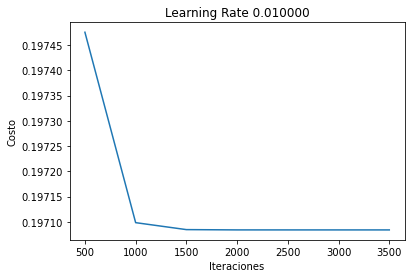

learning rate: 0.05, iteraciones:   500, costo: 0.19708399434717327470
learning rate: 0.05, iteraciones:  1000, costo: 0.19708399340579235703
learning rate: 0.05, iteraciones:  1500, costo: 0.19708399340579224601
learning rate: 0.05, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3500, costo: 0.19708399340579221826


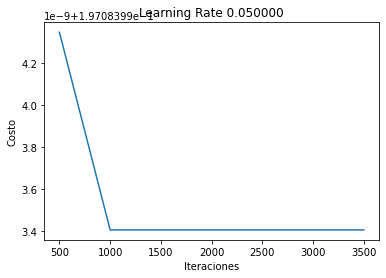

learning rate: 0.10, iteraciones:   500, costo: 0.19708399340579232928
learning rate: 0.10, iteraciones:  1000, costo: 0.19708399340579221826
learning rate: 0.10, iteraciones:  1500, costo: 0.19708399340579221826
learning rate: 0.10, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.10, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.10, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.10, iteraciones:  3500, costo: 0.19708399340579221826


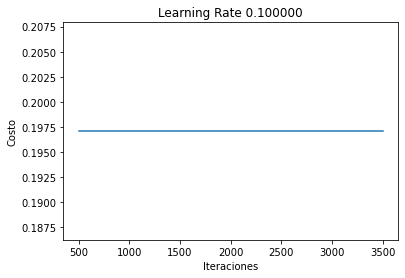

learning rate: 0.20, iteraciones:   500, costo: 0.19708399340579219050
learning rate: 0.20, iteraciones:  1000, costo: 0.19708399340579221826
learning rate: 0.20, iteraciones:  1500, costo: 0.19708399340579221826
learning rate: 0.20, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.20, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.20, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.20, iteraciones:  3500, costo: 0.19708399340579221826


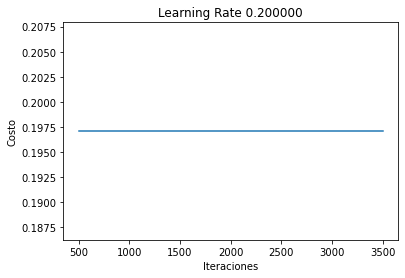

learning rate: 0.30, iteraciones:   500, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  1000, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  1500, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.30, iteraciones:  3500, costo: 0.19708399340579221826


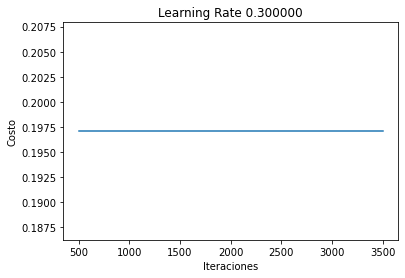

learning rate: 0.40, iteraciones:   500, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  1000, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  1500, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.40, iteraciones:  3500, costo: 0.19708399340579221826


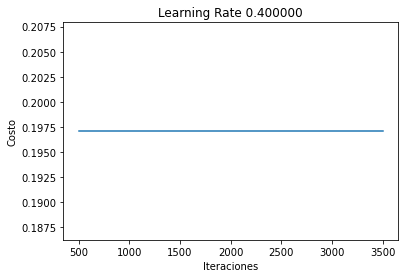

In [69]:
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
learning_rates = [0.01,0.05,0.1, 0.2, 0.3, 0.4]

n_features = X_train.shape[1]

for alpha in learning_rates:
    costo_gradiente = []
    for iteracion in  iteraciones:
        theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iteracion)
        costo_gradiente.append(cost_history_r[-1])
        print("learning rate: %1.2f, iteraciones: %5d, costo: %2.20f"%(alpha,iteracion,cost_history_r[-1]))
    
    plt.plot(iteraciones, costo_gradiente)
    plt.title('Learning Rate %f'%alpha)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.show()

In [71]:
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
learning_rates = [0.01,0.05,0.1, 0.2, 0.3, 0.4]

n_features = X_train.shape[1]

for alpha in learning_rates:
    costo_gradiente = []
    tabla = []
    for iteracion in  iteraciones:
        theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iteracion)
        costo_gradiente.append(cost_history_r[-1])
        tabla.append([alpha,iteracion,cost_history_r[-1]])
        print("learning rate: %1.2f, iteraciones: %5d, costo: %2.20f"%(alpha,iteracion,cost_history_r[-1]))

data_frames = pd.DataFrame(tabla,columns=['learning rate','iteraciones','costo'],dtype=float)
print(data_frames)


learning rate: 0.01, iteraciones:   500, costo: 0.19747518779476119777
learning rate: 0.01, iteraciones:  1000, costo: 0.19709836785495812861
learning rate: 0.01, iteraciones:  1500, costo: 0.19708459256815991090
learning rate: 0.01, iteraciones:  2000, costo: 0.19708401839675779299
learning rate: 0.01, iteraciones:  2500, costo: 0.19708399444816471213
learning rate: 0.01, iteraciones:  3000, costo: 0.19708399344926957886
learning rate: 0.01, iteraciones:  3500, costo: 0.19708399340760568430
learning rate: 0.05, iteraciones:   500, costo: 0.19708399434717327470
learning rate: 0.05, iteraciones:  1000, costo: 0.19708399340579235703
learning rate: 0.05, iteraciones:  1500, costo: 0.19708399340579224601
learning rate: 0.05, iteraciones:  2000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  2500, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3000, costo: 0.19708399340579221826
learning rate: 0.05, iteraciones:  3500, costo: 0.19708399340579221826
learni